In [1]:
# import machine learning libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
pwd

'C:\\Users\\Virender Pal Singh'

In [3]:
cd C:\\Users\\Virender Pal Singh\\Desktop\\Document\\machine_learing\\

C:\Users\Virender Pal Singh\Desktop\Document\machine_learing


In [4]:
df = pd.read_csv('C:\\Users\\Virender Pal Singh\\Desktop\\Document\\machine_learing\\heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
################################################# Data Description ############################################## 
# age - age in years 
# sex - (1 = male; 0 = female) 
# cp - chest pain type 
# trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
# chol - serum cholestoral in mg/dl 
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
# restecg - resting electrocardiographic results 
# thalach - maximum heart rate achieved 
# exang - exercise induced angina (1 = yes; 0 = no) 
# oldpeak - ST depression induced by exercise relative to rest 
# slope - the slope of the peak exercise ST segment 
# ca - number of major vessels (0-3) colored by flourosopy 
# thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
# target - have disease or not (1=yes, 0=no)

In [7]:
# calculating how many should have heart disease and how many should have not a heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

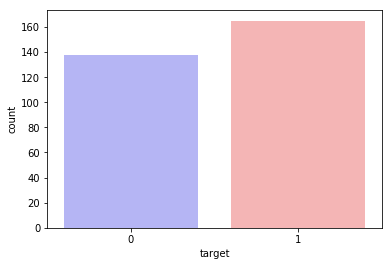

In [8]:
# visulazie the target value 
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [9]:
# calculation of the percentage of target value
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


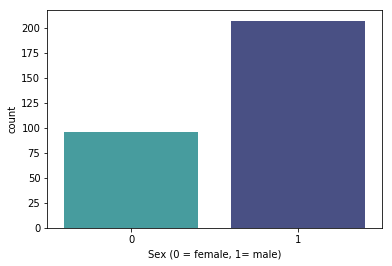

In [10]:
# calculating number of male and female in dataframe
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [11]:
# calculation of percentage of male and female in dataframe 
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [12]:
# calculation of mean of all the columns regarding to the target value
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


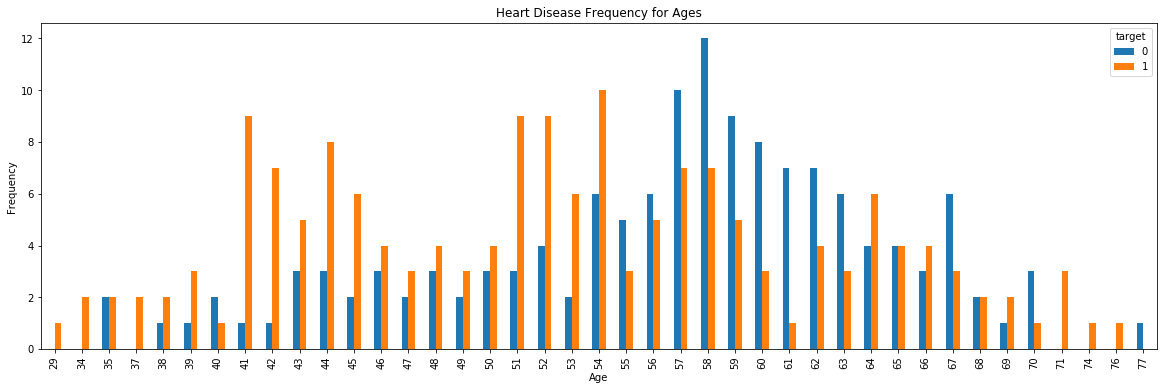

In [13]:
# plot the graph target vs age(calculating : Heart Disease frequency for the age)
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

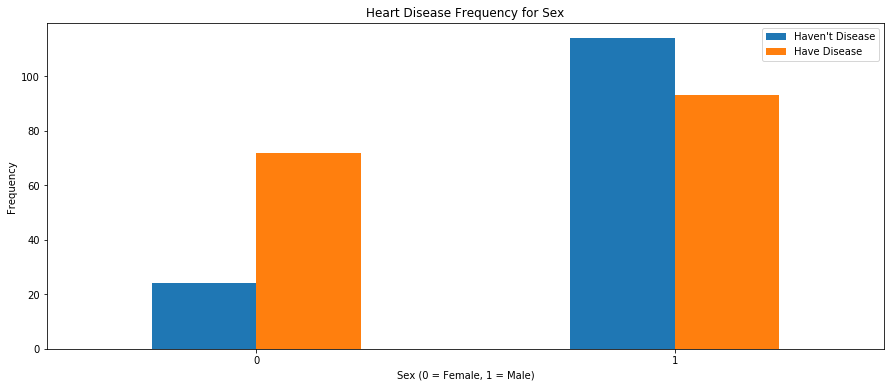

In [14]:
# plot the target vs sex(calculating : Heart Disease Frequency for Sex )
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0) # use to rotate the xlabel for horizontal to vertical
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

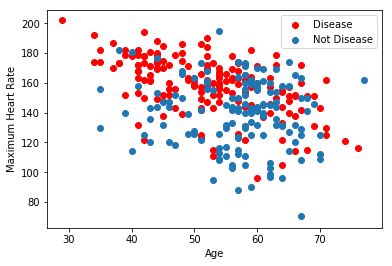

In [15]:
# calculating or vizulazie  the target value with respectively with Maximum heart rate 
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

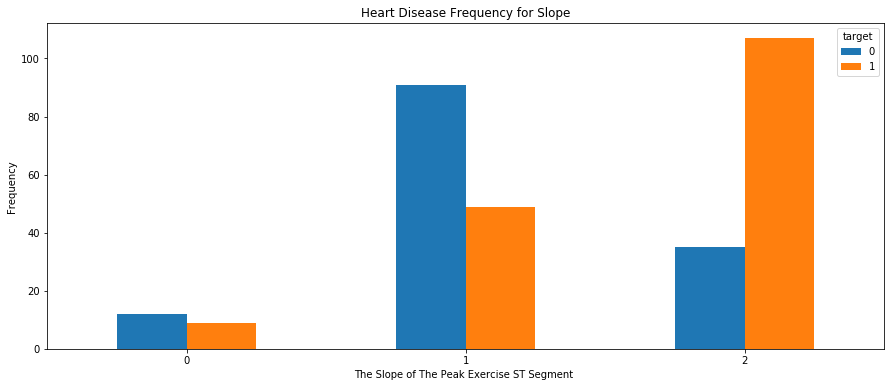

In [16]:
# plot the target vs slope(calculating : Heart Disease Frequency for Slope)
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

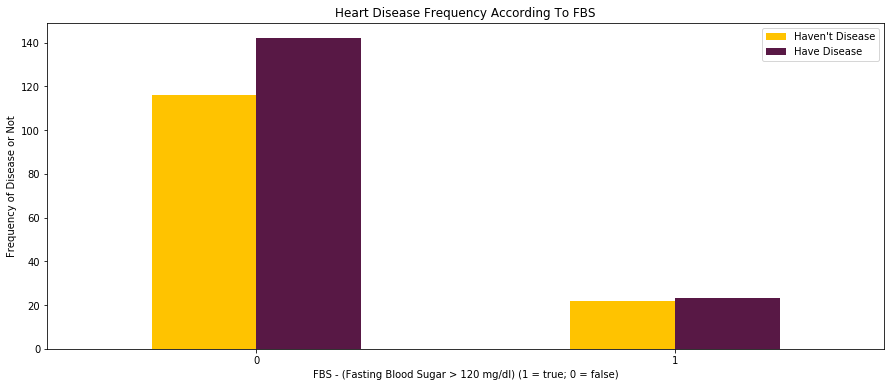

In [17]:
# plot the target vs fbs(calculating : Heart Disease Frequency According To FBS)
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()


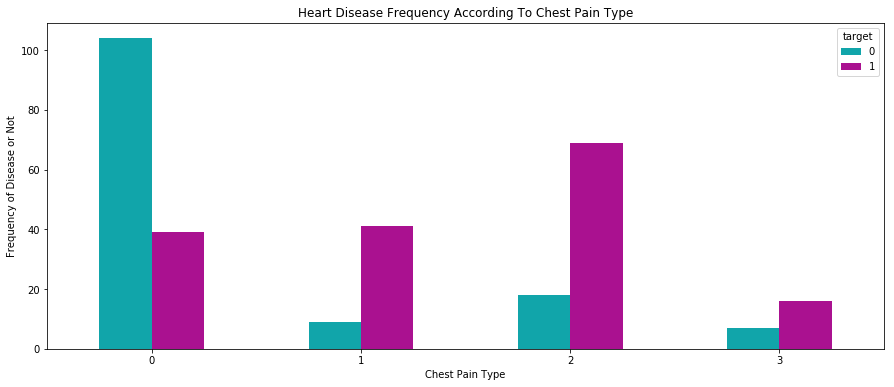

In [18]:
# plot the target vs chest pain(calculating : Heart Disease Frequency According To chest pain type)
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [19]:
########################### Creating Dummy Variables ######################################
# this is done, Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
# cp - (cp_0, cp_1, cp_2, cp_3)
# thal -> (thal_0, thal_1, thal_2, thal_3)
# slpoe -> (slope_0, slope_1, slope_2)
# 1 = true , 0 = false
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [20]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [21]:
# Droping the thal , cp and slope
#df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [22]:
############################ Creating Model for Logistic Regression ####################################

In [41]:
# split th data into x and ground truths
y = df.target.values
x_data = df.drop(['target'], axis = 1)

#############################################################################

# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [42]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [43]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


In [44]:
# let we have to inizialize the weight and baies

# initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01) ## full is used to initialize with 0.01 to all the value of matrix
    bias = 0.0
    return weight,bias

In [45]:
# sigmoid Function 
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [46]:
# Forward and Backward Propagation

def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)  #  This is our hypothesis function.
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head)) # This is our loss Function
    cost = np.sum(loss) / x_train.shape[1]  # this is our cost of the loss function
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]  # derivative of our weights
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]  # derivative of our bias
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias} # store in dict 
    
    return cost,gradients

In [47]:
# Graident Descent of our Model
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)  # This Give cost and gradients  for each iterations
        weight = weight - learningRate * gradients["Derivative Weight"]# update the weight for each iterations
        bias = bias - learningRate * gradients["Derivative Bias"]# update the weight for each iterations
        costList.append(cost) # list of all cost 
        index.append(i) # list of index in each iterations

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [48]:
# predition for our heat_model

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [49]:
##############################################  "Logigitic model" #####################################

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    

    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)/100*100))

iteration: 100
cost: 0.3591089208505418


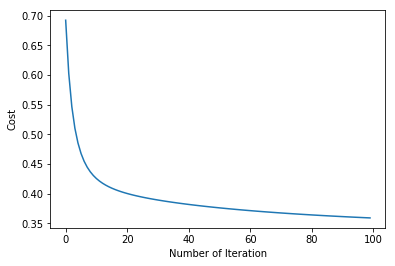

Manuel Test Accuracy: 86.89%


In [51]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [52]:
# Sklearn Logistic Regression

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 86.89%


C:\Users\Virender Pal Singh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
